In [1]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
os.chdir('..')
import functions.helperfunctions as hf

In [2]:
ff1 = 'data/output/pairing_MI-IPA/step_screen/'

In [3]:
allresults = []
for f in os.listdir(ff1):
    if '.csv' in f:
        print(f)
        f1 = f.replace('small_ind', 'smallInd')
        f1 = f1.replace('prop_test', 'propTest')
        properties = {x.split('-')[0]:x.split('-')[1] for x in f1.split('_') if '.csv' not in x}
        results, N = hf.load_df_TPR(ff1 + f)
        results = pd.DataFrame(np.array(np.array([x for x in results])))
        its = results.shape[1]-1
        results['test_size'] = N
        results['final_test'] = results[its]
        results['final_test_prop'] = results[its] / N
        results['epitope'] = properties['epitope']
        results['step'] = properties['step']
        allresults.append(results)

epitope-YLQPRTFLL_weights-0.6_L-0.6_method-None_prop_test-all_confidence-none_correlation-no_translation-no_ind-no_vgene-no_step-8_ones-keep_test.csv.gz
epitope-YLQPRTFLL_weights-0.6_L-0.6_method-None_prop_test-all_confidence-none_correlation-no_translation-no_ind-no_vgene-no_step-9_ones-keep_test.csv.gz
epitope-YLQPRTFLL_weights-0.6_L-0.6_method-None_prop_test-all_confidence-none_correlation-no_translation-no_ind-no_vgene-no_step-15_ones-keep_test.csv.gz
epitope-YLQPRTFLL_weights-0.6_L-0.6_method-None_prop_test-all_confidence-none_correlation-no_translation-no_ind-no_vgene-no_step-3_ones-keep_test.csv.gz
epitope-GLCTLVAML_weights-0.6_L-0.6_method-None_prop_test-all_confidence-none_correlation-no_translation-no_ind-no_vgene-no_step-6_ones-keep_test.csv.gz
epitope-GLCTLVAML_weights-0.6_L-0.6_method-None_prop_test-all_confidence-none_correlation-no_translation-no_ind-no_vgene-no_step-2_ones-keep_test.csv.gz
epitope-YLQPRTFLL_weights-0.6_L-0.6_method-None_prop_test-all_confidence-none_cor

In [4]:
all_results = pd.concat(allresults)

In [5]:
print(all_results)

     0     1     2     3     4     5     6     7     8     9    ...  336  337  \
0   18.0  13.0  12.0  12.0  10.0  11.0   8.0   9.0  13.0  15.0  ...  NaN  NaN   
1   20.0  24.0  20.0  20.0  17.0  14.0  16.0  14.0  15.0  16.0  ...  NaN  NaN   
2   18.0  24.0  29.0  23.0  20.0  20.0  19.0  22.0  20.0  20.0  ...  NaN  NaN   
3   20.0  19.0  23.0  27.0  23.0  23.0  19.0  21.0  21.0  24.0  ...  NaN  NaN   
4   16.0  15.0  15.0  15.0  15.0  21.0  21.0  19.0  15.0  15.0  ...  NaN  NaN   
..   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...  ...  ...   
5   16.0  22.0  20.0  21.0  16.0  16.0  17.0  13.0  12.0  14.0  ...  NaN  NaN   
6   11.0  18.0  21.0  22.0  17.0  20.0  26.0  21.0  18.0  19.0  ...  NaN  NaN   
7   15.0  22.0  21.0  17.0  17.0  16.0  17.0  17.0  15.0  20.0  ...  NaN  NaN   
8   15.0  16.0  12.0  11.0  12.0  14.0  16.0  14.0  10.0  11.0  ...  NaN  NaN   
9   23.0  26.0  22.0  17.0  19.0  25.0  28.0  21.0  25.0  27.0  ...  NaN  NaN   

    338  339  340  341  342

In [6]:
Rmelt = pd.melt(all_results, id_vars = ['epitope', 'step', 'final_test_prop', 'final_test', 'test_size'])

In [7]:
print(Rmelt)

          epitope step  final_test_prop  final_test  test_size variable  value
0       YLQPRTFLL    8         0.090090        30.0        333        0   18.0
1       YLQPRTFLL    8         0.093093        31.0        333        0   20.0
2       YLQPRTFLL    8         0.081081        27.0        333        0   18.0
3       YLQPRTFLL    8         0.072072        24.0        333        0   20.0
4       YLQPRTFLL    8         0.051051        17.0        333        0   16.0
...           ...  ...              ...         ...        ...      ...    ...
138395  YLQPRTFLL   20         0.051051        17.0        333      345    NaN
138396  YLQPRTFLL   20         0.081081        27.0        333      345    NaN
138397  YLQPRTFLL   20         0.090090        30.0        333      345    NaN
138398  YLQPRTFLL   20         0.054054        18.0        333      345    NaN
138399  YLQPRTFLL   20         0.093093        31.0        333      345    NaN

[138400 rows x 7 columns]


Lineplots for everything

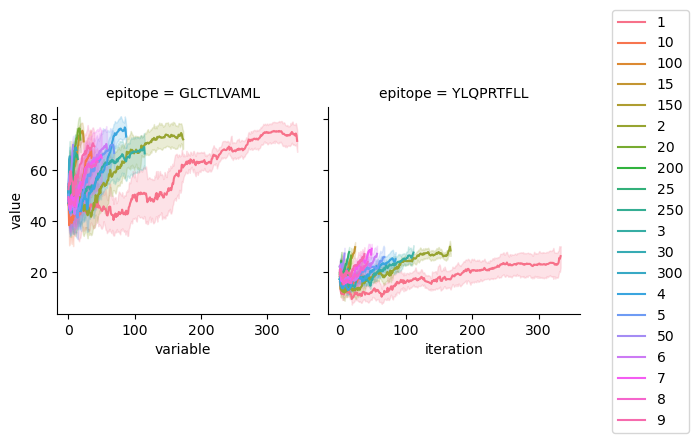

In [8]:
Rmelt = Rmelt.sort_values(by = ['epitope','step'])
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
# d = {'color':sns.color_palette('flare',5) + ['black'], 'ls' : ['-', '--', '-.', ':', '--', '-']}
g = sns.FacetGrid(Rmelt[['epitope','step','variable','value']], col = 'epitope', hue='step', col_wrap=2)
g.map(sns.lineplot, 'variable', 'value', errorbar = ('ci',95))
plt.legend(bbox_to_anchor = [1.1,1.5], loc='upper left')
plt.xlabel('iteration')
plt.ylabel('number correct in iteration')
plt.show()

A single plot to show summary performance

In [9]:
Rmelt['step'] = Rmelt['step'].astype('int')
rmelt1 = Rmelt[['final_test_prop','epitope','step']].drop_duplicates().sort_values(by='epitope')
rmelt1['score_type'] = 'Precision'

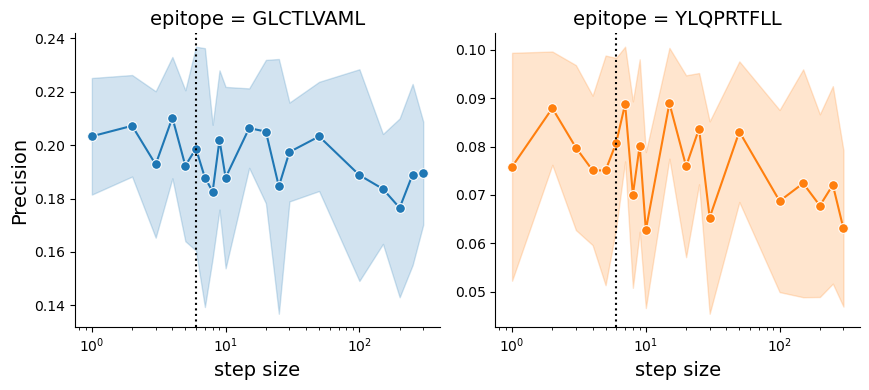

In [10]:
# f, ax = plt.subplots(ncols=2, sharey=True)
g =  sns.FacetGrid(rmelt1, col='epitope', sharey=False, hue = 'epitope', height=4, aspect=1.1)
g = g.map_dataframe(sns.lineplot, x='step', y='final_test_prop', markers=True, style = 'epitope',
                markersize = 7, errorbar = 'sd')
g.set_titles(size=14)
g.set_axis_labels('step size', 'Precision',fontsize=14)
# sns.lineplot(rmelt1, x = 'step', y = 'final_test_prop', hue = 'epitope', style='epitope', markers=True, 
#                 markersize = 10, errorbar = 'sd', ax = ax,
#                 err_style='band')
# ax.legend(bbox_to_anchor = [1,1], loc='upper right')
# ax.set_xlabel(r'step size', fontdict={'size':14})
# ax.set_ylabel('Precision', fontdict={'size':14})
# 
# ax.set_xticks(Rmelt['step'].unique())
# ax.set_xticklabels(Rmelt['step'].unique(), rotation=90)
# ax.set_ylim(0.04,0.23)
for ax in g.axes.flat:
    ax.axvline(6, c = 'k', ls = ':')
    ax.set_xscale('log')
    # ax.set_xticks(Rmelt['step'].unique())
    # ax.set_xticklabels(Rmelt['step'].unique(), rotation=90)
# ax.axhline(1/17.25, c=ax.get_lines()[-2].get_c())
# ax.axhline(1/33.3, c=ax.get_lines()[-2].get_c(), ls = 'dashed')
plt.tight_layout()
g.savefig('figures/step_lineplots_GLC-YLQ_TPR.png',
                    bbox_inches='tight')
plt.show()

In [11]:
allresults = []
for f in os.listdir(ff1):
    if '.csv' in f:
        print(f)
        f1 = f.replace('small_ind', 'smallInd')
        f1 = f1.replace('prop_test', 'propTest')
        properties = {x.split('-')[0]:x.split('-')[1] for x in f1.split('_') if '.csv' not in x}
        results, N = hf.load_df_recall(ff1 + f)
        results = pd.DataFrame(np.array(np.array([x for x in results])))
        its = results.shape[1]-1
        results['test_size'] = N
        results['final_test'] = results[its]
        results['final_test_prop'] = results[its] / N
        results['epitope'] = properties['epitope']
        results['step'] = properties['step']
        allresults.append(results)

epitope-YLQPRTFLL_weights-0.6_L-0.6_method-None_prop_test-all_confidence-none_correlation-no_translation-no_ind-no_vgene-no_step-8_ones-keep_test.csv.gz
epitope-YLQPRTFLL_weights-0.6_L-0.6_method-None_prop_test-all_confidence-none_correlation-no_translation-no_ind-no_vgene-no_step-9_ones-keep_test.csv.gz
epitope-YLQPRTFLL_weights-0.6_L-0.6_method-None_prop_test-all_confidence-none_correlation-no_translation-no_ind-no_vgene-no_step-15_ones-keep_test.csv.gz
epitope-YLQPRTFLL_weights-0.6_L-0.6_method-None_prop_test-all_confidence-none_correlation-no_translation-no_ind-no_vgene-no_step-3_ones-keep_test.csv.gz
epitope-GLCTLVAML_weights-0.6_L-0.6_method-None_prop_test-all_confidence-none_correlation-no_translation-no_ind-no_vgene-no_step-6_ones-keep_test.csv.gz
epitope-GLCTLVAML_weights-0.6_L-0.6_method-None_prop_test-all_confidence-none_correlation-no_translation-no_ind-no_vgene-no_step-2_ones-keep_test.csv.gz
epitope-YLQPRTFLL_weights-0.6_L-0.6_method-None_prop_test-all_confidence-none_cor

In [12]:
all_results = pd.concat(allresults)

In [13]:
Rmelt = pd.melt(all_results, id_vars = ['epitope', 'step', 'final_test_prop', 'final_test', 'test_size'])

A single plot to show summary performance

In [14]:
Rmelt['step'] = Rmelt['step'].astype('int')
rmelt10 = Rmelt[['final_test_prop','epitope','step']].drop_duplicates().sort_values(by='epitope')
rmelt10['score_type'] = 'recall'

In [15]:
rmelt1 = pd.concat([rmelt1, rmelt10])

In [16]:
from matplotlib.lines import Line2D

In [17]:
legend_elements = [Line2D([0], [0], color='k', ls='-', marker='o',
                          markeredgecolor='white', markersize=8),
                   Line2D([0], [0], marker='X', color='k', ls='--',
                          markeredgecolor='white', markersize=8)]

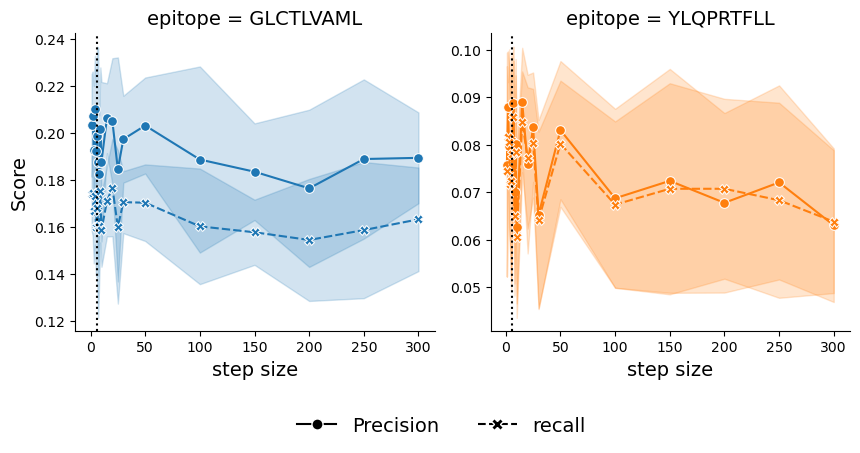

In [18]:
g =  sns.FacetGrid(rmelt1, col='epitope', sharey=False, hue = 'epitope', height=4, aspect=1.1)
g = g.map_dataframe(sns.lineplot, x='step', y='final_test_prop', style='score_type', markers=True,
                markersize = 7, errorbar = 'sd').add_legend(dict(zip(rmelt1['score_type'].unique(),legend_elements)), label_order=rmelt1['score_type'].unique())
g.set_titles(size=14)
g.set_axis_labels('step size', 'Score',fontsize=14)
for ax in g.axes.flat:
    ax.axvline(6, c = 'k', ls = ':')
    # ax.set_xscale('log')
lgd=sns.move_legend(g, 'upper center', title='',
    bbox_to_anchor=(.45, -0.01), ncol=2, frameon=False, fontsize=14, title_fontsize=14)
g.tight_layout()
g.savefig('figures/step_lineplots_GLC-YLQ_TPR-recall.png',
                    bbox_inches='tight')
plt.show()